# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2




# Read and clean data

Import your data, either through an API or manually, and load it. 

In [2]:
#step 1, we explore and inspect the datasets for whether they need cleaning:

women_data = pd.read_excel('IncomeEthnicityWomen.xlsx')
men_data = pd.read_excel('IncomeEthnicityMen.xlsx')

women_data
men_data

#Given that we inspect it via the text editor, we find that the dtaa dosn't start in the cornor as would be inspected
#here we instead find that the data starts at row 4 
#to fix this we import the data again and simply skip the unnessecary rows and columns

,"Indkomster for personer over 14 år efter indkomsttype, køn, enhed, region/landsdel, alder, herkomst og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Enhed: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
2,"2 Indkomst i alt, før skatter mv. (3+7+22+26+29)",Mænd,Gennemsnit for alle personer (kr.),Hele landet,Under 29 år,Dansk oprindelse,143234.0,143942.0,145939.0,149782.0,153277.0,159458.0,165710.0,169704.0,176775.0,189393.0,194594.0
3,NaN,NaN,NaN,NaN,NaN,Indvandrere fra vestlige lande,132732.0,140865.0,147840.0,154707.0,160655.0,168070.0,179246.0,194567.0,207427.0,219150.0,232906.0
4,NaN,NaN,NaN,NaN,NaN,Indvandrere fra ikke vestlige lande,138169.0,138410.0,140213.0,144759.0,142507.0,146522.0,156786.0,168155.0,177068.0,192371.0,203645.0
5,NaN,NaN,NaN,NaN,NaN,Efterkommere fra vestlige lande,103744.0,104768.0,106776.0,115138.0,117010.0,124228.0,130339.0,135868.0,142130.0,149219.0,155514.0
6,NaN,NaN,NaN,NaN,NaN,Efterkommere fra ikke vestlige lande,90033.0,92086.0,95690.0,100511.0,104430.0,108797.0,115807.0,122512.0,132916.0,151088.0,163062.0
7,NaN,NaN,NaN,NaN,30-49 år,Dansk oprindelse,431088.0,439884.0,448878.0,463555.0,470410.0,482337.0,489385.0,500823.0,523177.0,546464.0,555056.0
8,NaN,NaN,NaN,NaN,NaN,Indvandrere fra vestlige lande,359511.0,361198.0,367673.0,372288.0,373031.0,377695.0,388951.0,402027.0,423751.0,449789.0,460922.0
9,NaN,NaN,NaN,NaN,NaN,Indvandrere fra ikke vestlige lande,262263.0,265116.0,272399.0,279095.0,279908.0,288989.0,306324.0,324150.0,347579.0,374171.0,401317.0


In [3]:
#Step 2: Cleaning the data

#now we only import beneath the first 2 rows and above the last 2 rows as they are empty.
women_data = pd.read_excel('IncomeEthnicityWomen.xlsx',skiprows=2, skipfooter=2,)

#Skipping first 4 columns by slicing

women_data = women_data.iloc[:, 4:]

women_data

#we do the same for the men data:
men_data = pd.read_excel('IncomeEthnicityMen.xlsx',skiprows=2, skipfooter=2,)

#Skipping first 4 columns by slicing

men_data = men_data.iloc[:, 4:]

men_data

,Unnamed: 4,Unnamed: 5,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29 år,Dansk oprindelse,143234,143942,145939,149782,153277,159458,165710,169704,176775,189393,194594
1,NaN,Indvandrere fra vestlige lande,132732,140865,147840,154707,160655,168070,179246,194567,207427,219150,232906
2,NaN,Indvandrere fra ikke vestlige lande,138169,138410,140213,144759,142507,146522,156786,168155,177068,192371,203645
3,NaN,Efterkommere fra vestlige lande,103744,104768,106776,115138,117010,124228,130339,135868,142130,149219,155514
4,NaN,Efterkommere fra ikke vestlige lande,90033,92086,95690,100511,104430,108797,115807,122512,132916,151088,163062
5,30-49 år,Dansk oprindelse,431088,439884,448878,463555,470410,482337,489385,500823,523177,546464,555056
6,NaN,Indvandrere fra vestlige lande,359511,361198,367673,372288,373031,377695,388951,402027,423751,449789,460922
7,NaN,Indvandrere fra ikke vestlige lande,262263,265116,272399,279095,279908,288989,306324,324150,347579,374171,401317
8,NaN,Efterkommere fra vestlige lande,406238,408058,406063,442159,434539,444000,458190,453981,478247,496234,553823
9,NaN,Efterkommere fra ikke vestlige lande,311446,314664,323615,337391,340672,351701,358742,372289,390672,414632,429584


In [4]:
#next we see that row 4 and 5 simply are unnamed, but we know what they are supposed to be. 
#so we change them into agegroup and ethnicity

men_data.rename(columns={"Unnamed: 4" : "Age_group", "Unnamed: 5": "Ethnicity"}, inplace=True)  # type: ignore
women_data.rename(columns={"Unnamed: 4" : "Age_group", "Unnamed: 5": "Ethnicity"}, inplace=True)  # type: ignore

men_data

,Age_group,Ethnicity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29 år,Dansk oprindelse,143234,143942,145939,149782,153277,159458,165710,169704,176775,189393,194594
1,NaN,Indvandrere fra vestlige lande,132732,140865,147840,154707,160655,168070,179246,194567,207427,219150,232906
2,NaN,Indvandrere fra ikke vestlige lande,138169,138410,140213,144759,142507,146522,156786,168155,177068,192371,203645
3,NaN,Efterkommere fra vestlige lande,103744,104768,106776,115138,117010,124228,130339,135868,142130,149219,155514
4,NaN,Efterkommere fra ikke vestlige lande,90033,92086,95690,100511,104430,108797,115807,122512,132916,151088,163062
5,30-49 år,Dansk oprindelse,431088,439884,448878,463555,470410,482337,489385,500823,523177,546464,555056
6,NaN,Indvandrere fra vestlige lande,359511,361198,367673,372288,373031,377695,388951,402027,423751,449789,460922
7,NaN,Indvandrere fra ikke vestlige lande,262263,265116,272399,279095,279908,288989,306324,324150,347579,374171,401317
8,NaN,Efterkommere fra vestlige lande,406238,408058,406063,442159,434539,444000,458190,453981,478247,496234,553823
9,NaN,Efterkommere fra ikke vestlige lande,311446,314664,323615,337391,340672,351701,358742,372289,390672,414632,429584


In [5]:
def fill_age_groups(df):
    age_group = None
    for index, row in df.iterrows():
        if pd.notna(row['Age_group']):
            age_group = row['Age_group']
        else:
            df.at[index, 'Age_group'] = age_group
    
    # Rename the age groups
    df['Age_group'] = df['Age_group'].map({
        'Under 29 år': 'Under 29',
        '30-49 år': '30-49',
        '50 år og derover': '50 og over'
    })
    
    return df

# Apply the function to fill in the age gaps and rename the age groups for men_data
men_data = fill_age_groups(men_data)
men_data


,Age_group,Ethnicity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29,Dansk oprindelse,143234,143942,145939,149782,153277,159458,165710,169704,176775,189393,194594
1,Under 29,Indvandrere fra vestlige lande,132732,140865,147840,154707,160655,168070,179246,194567,207427,219150,232906
2,Under 29,Indvandrere fra ikke vestlige lande,138169,138410,140213,144759,142507,146522,156786,168155,177068,192371,203645
3,Under 29,Efterkommere fra vestlige lande,103744,104768,106776,115138,117010,124228,130339,135868,142130,149219,155514
4,Under 29,Efterkommere fra ikke vestlige lande,90033,92086,95690,100511,104430,108797,115807,122512,132916,151088,163062
5,30-49,Dansk oprindelse,431088,439884,448878,463555,470410,482337,489385,500823,523177,546464,555056
6,30-49,Indvandrere fra vestlige lande,359511,361198,367673,372288,373031,377695,388951,402027,423751,449789,460922
7,30-49,Indvandrere fra ikke vestlige lande,262263,265116,272399,279095,279908,288989,306324,324150,347579,374171,401317
8,30-49,Efterkommere fra vestlige lande,406238,408058,406063,442159,434539,444000,458190,453981,478247,496234,553823
9,30-49,Efterkommere fra ikke vestlige lande,311446,314664,323615,337391,340672,351701,358742,372289,390672,414632,429584


In [6]:
def fill_age_groups(df):
    age_group = None
    for index, row in df.iterrows():
        if pd.notna(row['Age_group']):
            age_group = row['Age_group']
        else:
            df.at[index, 'Age_group'] = age_group
    
    # Rename the age groups
    df['Age_group'] = df['Age_group'].map({
        'Under 29 år': 'Under 29',
        '30-49 år': '30-49',
        '50 år og derover': '50 og over'
    })
    
    return df

# Apply the function to fill in the age gaps and rename the age groups for men_data
women_data = fill_age_groups(women_data)
women_data


,Age_group,Ethnicity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Under 29,Dansk oprindelse,131425,132410,134281,138719,138889,143694,148410,151890,158756,169592,169559
1,Under 29,Indvandrere fra vestlige lande,112437,116033,124379,127918,134700,141490,150972,161100,171685,184148,197846
2,Under 29,Indvandrere fra ikke vestlige lande,120323,121622,122304,123078,121949,121540,126429,132111,140113,152530,159405
3,Under 29,Efterkommere fra vestlige lande,105994,107911,111803,116709,121962,127289,128657,134858,137406,147807,148302
4,Under 29,Efterkommere fra ikke vestlige lande,88182,91073,93545,98818,102713,107801,115128,121909,132045,151628,160866
5,30-49,Dansk oprindelse,349902,355445,363095,371941,375214,382998,390428,399311,421011,433605,428268
6,30-49,Indvandrere fra vestlige lande,283474,286043,291144,298751,301079,307719,314520,328640,350154,372382,378701
7,30-49,Indvandrere fra ikke vestlige lande,230509,232575,235451,239844,240532,240826,248874,259534,278503,297366,306870
8,30-49,Efterkommere fra vestlige lande,344258,353693,355584,360372,362873,367878,372592,388374,405649,421668,404462
9,30-49,Efterkommere fra ikke vestlige lande,294852,297642,303763,311203,316842,322604,332419,342842,367481,381550,380966


In [7]:
#We now want to transform them from wide to long for easier comparison when we merge them

# In order to use the wide to long format further below we first need to assign a common stubname for each year in order to keep them from pivoting.
new_columns = {col: f"Income{col[-4:]}" for col in women_data.columns[2:]}
# Update the column names
women_data.rename(columns=new_columns, inplace=True)

#convert to long format
women_data_long = pd.wide_to_long(women_data, stubnames='Income', i=['Age_group', 'Ethnicity'], j='Year').reset_index()
women_data_long.head(15)


,Age_group,Ethnicity,Year,Income
0,Under 29,Dansk oprindelse,2012,131425
1,Under 29,Dansk oprindelse,2013,132410
2,Under 29,Dansk oprindelse,2014,134281
3,Under 29,Dansk oprindelse,2015,138719
4,Under 29,Dansk oprindelse,2016,138889
5,Under 29,Dansk oprindelse,2017,143694
6,Under 29,Dansk oprindelse,2018,148410
7,Under 29,Dansk oprindelse,2019,151890
8,Under 29,Dansk oprindelse,2020,158756
9,Under 29,Dansk oprindelse,2021,169592


In [8]:
#We then do the exact same thing for men
# In order to use the wide to long format further below we first need to assign a common stubname for each year in order to keep them from pivoting.
new_columns = {col: f"Income{col[-4:]}" for col in men_data.columns[2:]}
# Update the column names
men_data.rename(columns=new_columns, inplace=True)

#convert to long format
men_data_long = pd.wide_to_long(men_data, stubnames='Income', i=['Age_group', 'Ethnicity'], j='Year').reset_index()
men_data_long.head(15)

,Age_group,Ethnicity,Year,Income
0,Under 29,Dansk oprindelse,2012,143234
1,Under 29,Dansk oprindelse,2013,143942
2,Under 29,Dansk oprindelse,2014,145939
3,Under 29,Dansk oprindelse,2015,149782
4,Under 29,Dansk oprindelse,2016,153277
5,Under 29,Dansk oprindelse,2017,159458
6,Under 29,Dansk oprindelse,2018,165710
7,Under 29,Dansk oprindelse,2019,169704
8,Under 29,Dansk oprindelse,2020,176775
9,Under 29,Dansk oprindelse,2021,189393


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [9]:

def plot_gender(df, ethnicity, age_group): 
    I = (df['Ethnicity'] == ethnicity) & (df['Age_group'] == age_group)
    ax = plt.gca()  # Get or create the current Axes instance
    df.loc[I, :].plot(x='Year', y='Income', style='-o', legend=False, ax=ax)
    
    # Add description to the plot
    plt.text(0.5, 0.95, 'Men', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
    
    # Add axis labels
    plt.xlabel('Year')
    plt.ylabel('Mean income before taxes, kr.')
    
    plt.show()

# Create dropdown widgets for 'Ethnicity' and 'Age_group'
ethnicity_dropdown = widgets.Dropdown(description='Ethnicity', 
                                      options=men_data_long['Ethnicity'].unique(), 
                                      value=men_data_long['Ethnicity'].iloc[0])
age_group_dropdown = widgets.Dropdown(description='Age Group', 
                                      options=men_data_long['Age_group'].unique(), 
                                      value=men_data_long['Age_group'].iloc[0])

# Interactively call the plot function with the selected options
widgets.interact(plot_gender, 
    df=widgets.fixed(men_data_long),
    ethnicity=ethnicity_dropdown,
    age_group=age_group_dropdown
)


interactive(children=(Dropdown(description='Ethnicity', options=('Dansk oprindelse', 'Indvandrere fra vestlige…

<function __main__.plot_gender(df, ethnicity, age_group)>

In [10]:
def plot_gender(df, Ethnicity, Age_group): 
    I = (df['Ethnicity'] == Ethnicity) & (df['Age_group'] == Age_group)
    ax = plt.gca()  # Get or create the current Axes instance
    df.loc[I, :].plot(x='Year', y='Income', style='-o', legend=False, ax=ax)
    
    # Add description to the plot
    plt.text(0.5, 0.95, 'Women', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
    
    # Add axis labels
    plt.xlabel('Year')
    plt.ylabel('Mean income before taxes, kr.')
    
    plt.show()

# We create some drowndown menus for "Ethnicity" and "Age_groups"
Ethnicity_dropdown = widgets.Dropdown(description='Ethnicity', 
                                      options=women_data_long['Ethnicity'].unique(), 
                                      value=women_data_long['Ethnicity'].iloc[0])
age_group_dropdown = widgets.Dropdown(description='Age_Group', 
                                      options=women_data_long['Age_group'].unique(), 
                                      value=women_data_long['Age_group'].iloc[0])

# We call the plot function and add our dropdown menus
widgets.interact(plot_gender, 
    df=widgets.fixed(women_data_long),
    Ethnicity=Ethnicity_dropdown,
    Age_group=age_group_dropdown)



interactive(children=(Dropdown(description='Ethnicity', options=('Dansk oprindelse', 'Indvandrere fra vestlige…

<function __main__.plot_gender(df, Ethnicity, Age_group)>

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

As the title suggests we will now look into merging the two datasets. We use how = 'left' to merge them as we would like a dataset that has data points for age_group, ethnicity and year for both mean incomes. 

In [11]:
Merged_Genders = pd.merge(women_data_long, men_data_long, how= 'left', on=['Year', 'Age_group', 'Ethnicity'])
Merged_Genders.rename(columns={'Income_x': 'Income_Women', 'Income_y': 'Income_Men'}, inplace=True)
Merged_Genders.head(10)

,Age_group,Ethnicity,Year,Income_Women,Income_Men
0,Under 29,Dansk oprindelse,2012,131425,143234
1,Under 29,Dansk oprindelse,2013,132410,143942
2,Under 29,Dansk oprindelse,2014,134281,145939
3,Under 29,Dansk oprindelse,2015,138719,149782
4,Under 29,Dansk oprindelse,2016,138889,153277
5,Under 29,Dansk oprindelse,2017,143694,159458
6,Under 29,Dansk oprindelse,2018,148410,165710
7,Under 29,Dansk oprindelse,2019,151890,169704
8,Under 29,Dansk oprindelse,2020,158756,176775
9,Under 29,Dansk oprindelse,2021,169592,189393


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [20]:
Merged_Genders.groupby(['Ethnicity', 'Age_group'])[['Income_Women', 'Income_Men']].describe().head(16)


Income_Women                 \
                                                       count           mean   
Ethnicity                            Age_group                                
Dansk oprindelse                     30-49              11.0  388292.545455   
                                     50 og over         11.0  301526.363636   
                                     Under 29           11.0  147056.818182   
Efterkommere fra ikke vestlige lande 30-49              11.0  332014.909091   
                                     50 og over         11.0  339803.909091   
                                     Under 29           11.0  114882.545455   
Efterkommere fra vestlige lande      30-49              11.0  376127.545455   
                                     50 og over         11.0  346920.181818   
                                     Under 29           11.0  126245.272727   
Indvandrere fra ikke vestlige lande  30-49              11.0  255534.909091   
                                     50 og over         11.0  217707.000000   
                                     Under 29           11.0  131036.727273   
Indvandrere fra vestlige lande       30-49              11.0  319327.909091   
                                     50 og over         11.0  291627.909091   
                                     Under 29           11.0  147518.909091   

                                                                         \
                                                          std       min   
Ethnicity                            Age_group                            
Dansk oprindelse                     30-49       29157.991012  349902.0   
                                     50 og over  28481.025011  262020.0   
                                     Under 29    13949.515309  131425.0   
Efterkommere fra ikke vestlige lande 30-49       32152.502738  294852.0   
                                     50 og over  25160.780904  314397.0   
                                     Under 29    24495.117576   88182.0   
Efterkommere fra vestlige lande      30-49       25186.813075  344258.0   
                                     50 og over  47837.352242  292801.0   
                                     Under 29    14903.622943  105994.0   
Indvandrere fra ikke vestlige lande  30-49       26865.379645  230509.0   
                                     50 og over  21791.693390  190354.0   
                                     Under 29    13737.835099  120323.0   
Indvandrere fra vestlige lande       30-49       33880.523516  283474.0   
                                     50 og over  29704.057943  253558.0   
                                     Under 29    28279.501797  112437.0   

                                                                               \
                                                      25%       50%       75%   
Ethnicity                            Age_group                                  
Dansk oprindelse                     30-49       367518.0  382998.0  410161.0   
                                     50 og over  280010.5  298331.0  323720.0   
                                     Under 29    136500.0  143694.0  155323.0   
Efterkommere fra ikke vestlige lande 30-49       307483.0  322604.0  355161.5   
                                     50 og over  322374.5  327962.0  356226.5   
                                     Under 29     96181.5  107801.0  126977.0   
Efterkommere fra vestlige lande      30-49       357978.0  367878.0  396418.0   
                                     50 og over  309222.5  337613.0  365336.5   
                                     Under 29    114256.0  127289.0  136132.0   
Indvandrere fra ikke vestlige lande  30-49       237647.5  240826.0  269018.5   
                                     50 og over  202108.0  211020.0  233583.5   
                                     Under 29    121785.5  123078.0  136112.0   
Indvandrere fra vestlige lande       30-49       294947.5  

We can then construct some tables showcasing the differences between the ethnic groups across the age groups. We compare with those of ethnical danish origin.

In [19]:
# Group by 'Age_group' and 'Ethnicity', and calculate the mean for each group
grouped_means = Merged_Genders.groupby(['Age_group', 'Ethnicity']).mean().reset_index()

# Create a pivot table to have Ethnicity as columns
pivot_table = grouped_means.pivot(index='Age_group', columns='Ethnicity')

# Calculate the mean income for Danish origin for both men and women
danish_origin_mean_men = pivot_table['Income_Men']['Dansk oprindelse']
danish_origin_mean_women = pivot_table['Income_Women']['Dansk oprindelse']

# Subtract the mean income for Danish origin from the mean income of other ethnicities for both men and women
difference_from_danish_origin_men = pivot_table['Income_Men'].subtract(danish_origin_mean_men, axis=0)
difference_from_danish_origin_women = pivot_table['Income_Women'].subtract(danish_origin_mean_women, axis=0)

# We clean this table as well for both men and women
difference_from_danish_origin_men.drop(columns=['Dansk oprindelse'], inplace=True)
difference_from_danish_origin_women.drop(columns=['Dansk oprindelse'], inplace=True)

# Round the calculated differences to one decimal place for both men and women
difference_from_danish_origin_rounded_men = difference_from_danish_origin_men.round(1)
difference_from_danish_origin_rounded_women = difference_from_danish_origin_women.round(1)

# Display the calculated differences for both men and women

print("Differences in mean income compared to Danish origin (Women):")
display(difference_from_danish_origin_rounded_women)

print("\nDifferences in mean income compared to Danish origin (Men):")
display(difference_from_danish_origin_rounded_men)


Differences in mean income compared to Danish origin (Women):


Ethnicity,Efterkommere fra ikke vestlige lande,Efterkommere fra vestlige lande,Indvandrere fra ikke vestlige lande,Indvandrere fra vestlige lande
Age_group,,,,
30-49,-56277.6,-12165.0,-132757.6,-68964.6
50 og over,38277.5,45393.8,-83819.4,-9898.5
Under 29,-32174.3,-20811.5,-16020.1,462.1



Differences in mean income compared to Danish origin (Men):


Ethnicity,Efterkommere fra ikke vestlige lande,Efterkommere fra vestlige lande,Indvandrere fra ikke vestlige lande,Indvandrere fra vestlige lande
Age_group,,,,
30-49,-127786.3,-33593.2,-177249.6,-92201.9
50 og over,59828.1,21964.2,-153808.9,-31626.3
Under 29,-46806.9,-37006.7,-3927.5,13305.2


From these tables we see that for the group "Under 29" that descendants from non western countries tend to earn the least compared to those of danish origin while the difference for those of wester descent is almost half of the difference for those of non western countries. If we look at the immigrants we see that there is still a large income difference for the immigrants from non western countries, but that those from western countries earn approximately the same as those of danish origin. 

For the group 30-49 we see that the gap has almost trippled for descendants from non western countries, but diminished a bit from for descendants from western countries. The difference in income for immigrants from both non western countries and western countries has also exploded in size and the western immigrants no longer earn more or the same as those of danish origin

For the last group, 50 and above, we see that both the immigrants earn less than those of danish origin, while the descendants earn significantly higher than those of danish origin.



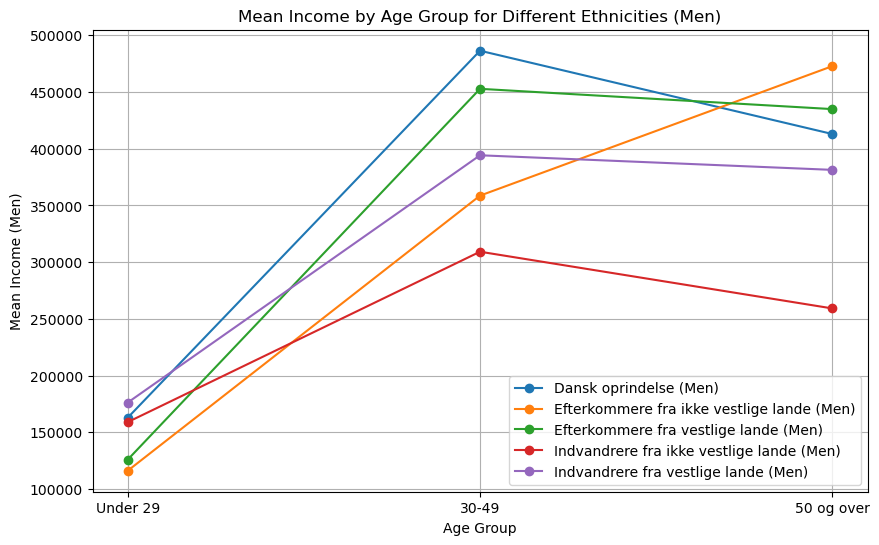

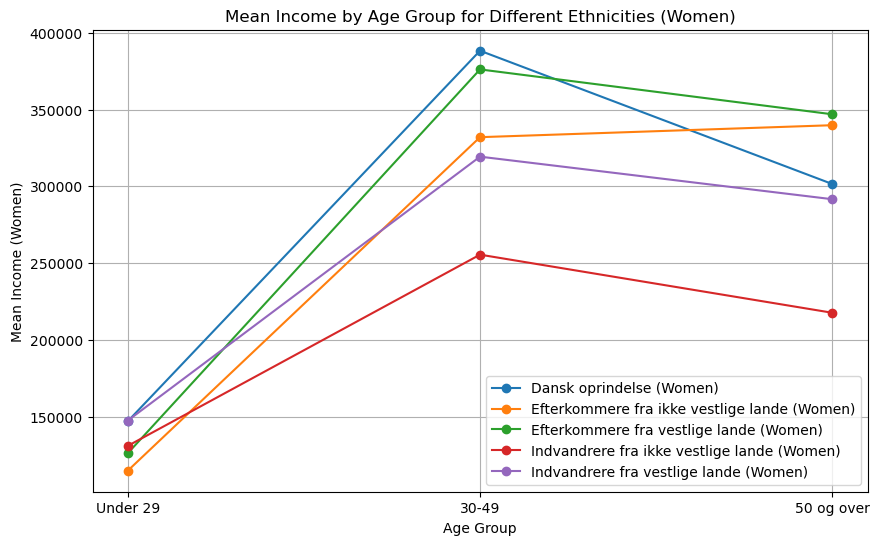

In [17]:


import pandas as pd

# Define the custom sorting order for age groups
custom_order = ['Under 29', '30-49', '50 og over']

# Reorder the 'Age_group' column based on the custom order
grouped_means['Age_group'] = pd.Categorical(grouped_means['Age_group'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'Age_group' column
grouped_means = grouped_means.sort_values(by='Age_group')

# Plot for men
plt.figure(figsize=(10, 6))
for ethnicity, data in grouped_means.groupby('Ethnicity'):
    plt.plot(data['Age_group'], data['Income_Men'], label=ethnicity + ' (Men)', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Mean Income (Men)')
plt.title('Mean Income by Age Group for Different Ethnicities (Men)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for women
plt.figure(figsize=(10, 6))
for ethnicity, data in grouped_means.groupby('Ethnicity'):
    plt.plot(data['Age_group'], data['Income_Women'], label=ethnicity + ' (Women)', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Mean Income (Women)')
plt.title('Mean Income by Age Group for Different Ethnicities (Women)')
plt.legend()
plt.grid(True)
plt.show()



Looking at the growth pattern of the mean income for men and women we see that descendants of non western immigrants are the only ones to have a consistently increasing mean income across all age groups, while there is a huge jump for all ethnicities from the youngest group to the middle aged group and then a decrease as we reach the later years. The decrease is likely due to retirement. 

We can also easily note that there is a large difference in income between men and women.

From the interactive plots we also see that there is a large income spike for descendants of non western immigrants in the age group 50 and above which seemingly comes out of nowhere.

# Conclusion

In this project we attempted to highlight the differences in income for different ethnic groups across age groups. We found that only the descendants of non western immigrants have increasing income across the age groups. We also found that for the age group 30-49 those of danish origin have a vastly higher income than the other ethnicities, but that the descendants of immigrants, both western and non western, tend to have a higher income later in life. This could be either due to them working later into their life than those of danish origin or another factor, but that is just a theory. We also found that the immigrants from non western countries tend to have the largest drop in income once they reach the 50 and above category while the rest decrease a tiny bit except the descendants of non western immigrants as noted earlier. 

We also found that the income for women of danish origin had a steep fall in the last age group compared to the men who also has a decrease albeit small in relative size. 